In [30]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [31]:
# Series: represents a 1D array of data. 
# The main difference between a Series and numpy array is that a Series,
# has an index

names = ['Ryan', 'Chiara', 'Johnny']
values = [35, 36, 1.8]
ages = pd.Series(values, index=names)
ages

Ryan      35.0
Chiara    36.0
Johnny     1.8
dtype: float64

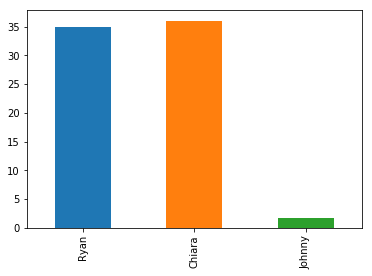

In [32]:
ages.plot(kind='bar')

In [33]:
np.log(ages) / ages**2

Ryan      0.002902
Chiara    0.002765
Johnny    0.181416
dtype: float64

In [34]:
ages.index

Index(['Ryan', 'Chiara', 'Johnny'], dtype='object')

In [35]:
ages.loc['Johnny']

1.8

In [36]:
ages.iloc[2]

1.8

In [37]:
ages.values

array([35. , 36. ,  1.8])

In [38]:
ages.index

Index(['Ryan', 'Chiara', 'Johnny'], dtype='object')

In [39]:
# first we create a dictionary
data = {'age': [35, 36, 1.8],
        'height': [180, 155, 83],
        'weight': [72.5, np.nan, 11.3]}
df = pd.DataFrame(data, index=['Ryan', 'Chiara', 'Johnny'])
df

,age,height,weight
Ryan,35.0,180,72.5
Chiara,36.0,155,NaN
Johnny,1.8,83,11.3


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Ryan to Johnny
Data columns (total 3 columns):
age       3 non-null float64
height    3 non-null int64
weight    2 non-null float64
dtypes: float64(2), int64(1)
memory usage: 96.0+ bytes


In [41]:
df.min()

age        1.8
height    83.0
weight    11.3
dtype: float64

In [42]:
df.mean()

age        24.266667
height    139.333333
weight     41.900000
dtype: float64

In [43]:
df.std()

age       19.463128
height    50.362023
weight    43.274935
dtype: float64

In [44]:
df.describe()

,age,height,weight
count,3.000000,3.000000,2.000000
mean,24.266667,139.333333,41.900000
std,19.463128,50.362023,43.274935
min,1.800000,83.000000,11.300000
25%,18.400000,119.000000,26.600000
50%,35.000000,155.000000,41.900000
75%,35.500000,167.500000,57.200000
max,36.000000,180.000000,72.500000


In [45]:
df['height']

Ryan      180
Chiara    155
Johnny     83
Name: height, dtype: int64

In [46]:
df.height

Ryan      180
Chiara    155
Johnny     83
Name: height, dtype: int64

In [47]:
df['density'] = df.weight / df.height
df

,age,height,weight,density
Ryan,35.0,180,72.5,0.402778
Chiara,36.0,155,NaN,NaN
Johnny,1.8,83,11.3,0.136145


In [48]:
education = pd.Series(['PhD', 'PhD', None, 'masters'],
                     index=['Ryan', 'Chiara', 'Johnny', 'Takaya'],
                     name='education')
# returns a new DataFrame
df.join(education)

,age,height,weight,density,education
Ryan,35.0,180,72.5,0.402778,PhD
Chiara,36.0,155,NaN,NaN,PhD
Johnny,1.8,83,11.3,0.136145,None


In [49]:
df.join(education, how='right')

,age,height,weight,density,education
Ryan,35.0,180.0,72.5,0.402778,PhD
Chiara,36.0,155.0,NaN,NaN,PhD
Johnny,1.8,83.0,11.3,0.136145,None
Takaya,NaN,NaN,NaN,NaN,masters


In [50]:
df.reindex(['Ryan', 'Chiara', 'Johnny', 'Takaya', 'Kerry'])

,age,height,weight,density
Ryan,35.0,180.0,72.5,0.402778
Chiara,36.0,155.0,NaN,NaN
Johnny,1.8,83.0,11.3,0.136145
Takaya,NaN,NaN,NaN,NaN
Kerry,NaN,NaN,NaN,NaN


In [51]:
df['is_adult'] = df.age > 18
df

,age,height,weight,density,is_adult
Ryan,35.0,180,72.5,0.402778,True
Chiara,36.0,155,NaN,NaN,True
Johnny,1.8,83,11.3,0.136145,False


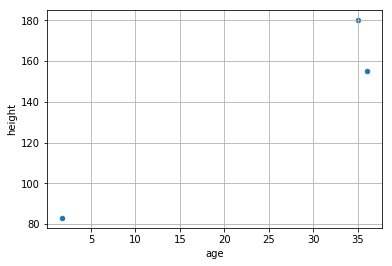

In [52]:
df.plot(kind='scatter', x='age', y='height', grid=True)

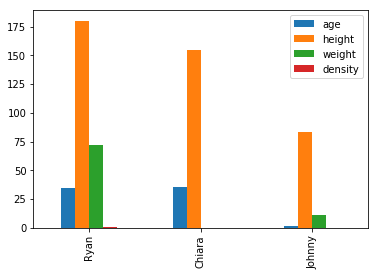

In [53]:
df.plot(kind='bar')

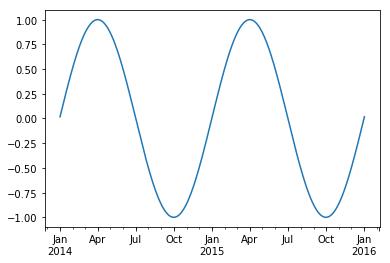

In [54]:
two_years = pd.date_range(start='2014-01-01', end='2016-01-01', freq='D')
timeseries = pd.Series(np.sin(2 *np.pi *two_years.dayofyear / 365),
                       index=two_years)
timeseries.plot()

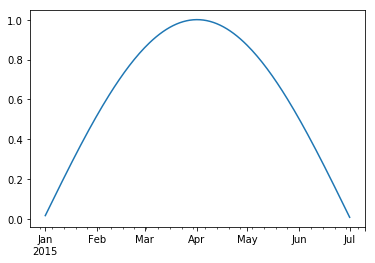

In [55]:
timeseries.loc['2015-01-01':'2015-07-01'].plot()

In [56]:
!curl -L -o goog.csv http://tinyurl.com/rces-goog
!curl -L -o aapl.csv http://tinyurl.com/rces-aapl-csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1103  100  1103    0     0   2260      0 --:--:-- --:--:-- --:--:--  2785
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1103  100  1103    0     0   2248      0 --:--:-- --:--:-- --:--:--     0


In [57]:
!head goog.csv

<html><head><meta http-equiv="content-type" content="text/html; charset=utf-8"/><title>Sorry...</title><style> body { font-family: verdana, arial, sans-serif; background-color: #fff; color: #000; }</style></head><body><div><table><tr><td><b><font face=sans-serif size=10><font color=#4285f4>G</font><font color=#ea4335>o</font><font color=#fbbc05>o</font><font color=#4285f4>g</font><font color=#34a853>l</font><font color=#ea4335>e</font></font></b></td><td style="text-align: left; vertical-align: bottom; padding-bottom: 15px; width: 50%"><div style="border-bottom: 1px solid #dfdfdf;">Sorry...</div></td></tr></table></div><div style="margin-left: 4em;"><h1>We're sorry...</h1><p>... but your computer or network may be sending automated queries. To protect our users, we can't process your request right now.</p></div><div style="margin-left: 4em;">See <a href="https://support.google.com/websearch/answer/86640">Google Help</a> for more information.<br/><br/></div><div style="text-align: cente

In [58]:
goog = pd.read('goog.csv')

AttributeError: module 'pandas' has no attribute 'read'

In [59]:
! curl -o nyc_temp.txt http://berkeleyearth.lbl.gov/auto/Local/TAVG/Text/40.99N-74.56W-TAVG-Trend.txt


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  313k  100  313k    0     0  1427k      0 --:--:-- --:--:-- --:--:-- 1424k


In [60]:
! head -72 nyc_temp.txt | tail -8


% 
%                  Monthly          Annual          Five-year        Ten-year        Twenty-year
% Year, Month,  Anomaly, Unc.,   Anomaly, Unc.,   Anomaly, Unc.,   Anomaly, Unc.,   Anomaly, Unc.
 
  1743    11    -2.276  1.665       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN
  1743    12       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN
  1744     1       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN
  1744     2       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN       NaN    NaN


In [61]:
##### http://berkeleyearth.lbl.gov/locations/40.99N-74.56W
# http://berkeleyearth.lbl.gov/auto/Local/TAVG/Text/40.99N-74.56W-TAVG-Trend.txt


#temp = pd.read_csv('nyc_temp.txt')

col_names = ['year', 'month', 'monthly_anom'] + 10*[]
temp = pd.read_csv('nyc_temp.txt',
                   header=None, usecols=[0, 1, 2], names=col_names,
                   delim_whitespace=True, comment='%')

temp.head()

,year,month,monthly_anom
0,1743,11,-2.276
1,1743,12,NaN
2,1744,1,NaN
3,1744,2,NaN
4,1744,3,NaN


In [62]:
# need a day
date_df = temp.drop('monthly_anom', axis=1)
date_df['day'] = 1
date_index = pd.DatetimeIndex(pd.to_datetime(date_df))
temp = temp.set_index(date_index).drop(['year', 'month'], axis=1)
temp.head()

,monthly_anom
1743-11-01,-2.276
1743-12-01,NaN
1744-01-01,NaN
1744-02-01,NaN
1744-03-01,NaN


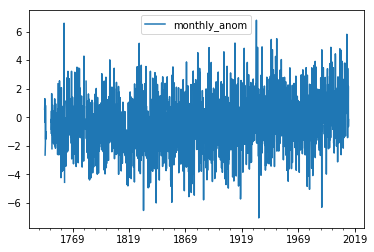

In [63]:
temp.plot()


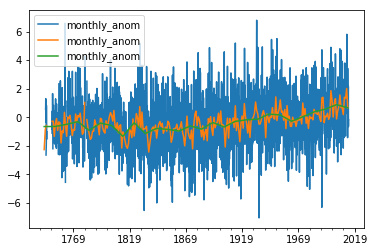

In [64]:
fig, ax = plt.subplots()
temp.plot(ax=ax)
temp.resample('AS').mean().plot(ax=ax)
temp.resample('10AS').mean().plot(ax=ax)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


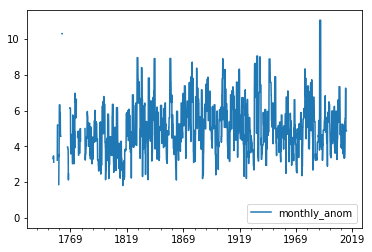

In [65]:
# more advanced operation on rolling windows
def difference_max_min(data):
    return data.max() - data.min()

rw = temp.rolling('365D')
rw.apply(difference_max_min).plot()

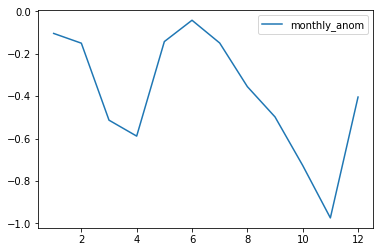

In [66]:
temp.groupby(temp.index.month).mean().plot()


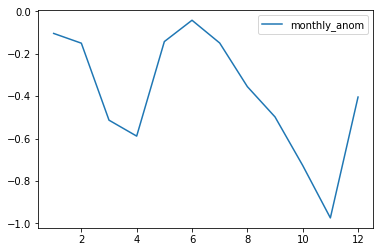

In [67]:
temp.groupby(temp.index.month).mean().plot()


In [68]:
rats = pd.read_csv('https://data.cityofnewyork.us/api/views/amyk-xiv9/rows.csv',
                  parse_dates=['APPROVED_DATE', 'INSPECTION_DATE'])

In [69]:
rats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193527 entries, 0 to 193526
Data columns (total 20 columns):
INSPECTION_TYPE                193527 non-null object
JOB_TICKET_OR_WORK_ORDER_ID    193527 non-null int64
JOB_ID                         193527 non-null object
JOB_PROGRESS                   193527 non-null int64
BBL                            193527 non-null int64
BORO_CODE                      193527 non-null int64
BLOCK                          193527 non-null int64
LOT                            193527 non-null int64
HOUSE_NUMBER                   190011 non-null object
STREET_NAME                    193476 non-null object
ZIP_CODE                       187571 non-null float64
X_COORD                        192368 non-null float64
Y_COORD                        192368 non-null float64
LATITUDE                       193518 non-null float64
LONGITUDE                      193518 non-null float64
BOROUGH                        193527 non-null object
INSPECTION_DATE           

In [70]:
rats.head()

,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,JOB_PROGRESS,BBL,BORO_CODE,BLOCK,LOT,HOUSE_NUMBER,STREET_NAME,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION
0,INITIAL,1738528,PO1738528,1,1011420037,1,1142,43,126,WEST 71 STREET,10023.0,989727.0,222405.0,40.776904,-73.979737,Manhattan,2018-06-27 15:15:05,Active Rat Signs,2018-06-29 14:44:40,"(40.776904192152, -73.979737087638)"
1,INITIAL,46795,PO46795,1,1021700450,1,2170,520,45,FAIRVIEW AVENUE,10040.0,1003735.0,251793.0,40.857283,-73.928556,Manhattan,2010-01-11 11:58:45,Active Rat Signs,2010-01-12 17:05:29,"(40.857282787383, -73.928556341891)"
2,INITIAL,1406481,PO1406481,1,2032990041,2,3299,30,317,EAST 201 STREET,10458.0,1016582.0,256573.0,40.871860,-73.884341,Bronx,2017-05-23 15:58:53,Active Rat Signs,2017-05-25 12:21:59,"(40.871859743689, -73.884340858273)"
3,INITIAL,867699,PO867699,1,1013050028,1,1324,7501,245,EAST 50 STREET,10022.0,992641.0,214487.0,40.756259,-73.971792,Manhattan,2014-10-02 01:53:21,Active Rat Signs,2014-10-06 11:18:45,"(40.756259197168, -73.971791626399)"
4,COMPLIANCE,1229623,PO1221091,2,1007410002,1,1050,29,541,9 AVENUE,10011.0,985956.0,215242.0,40.742978,-74.003869,Manhattan,2016-08-29 13:31:18,Active Rat Signs,2016-09-01 09:55:06,"(40.742977955918, -74.003868627596)"


In [71]:
rats.groupby('INSPECTION_TYPE')['INSPECTION_TYPE'].count()


INSPECTION_TYPE
COMPLIANCE     65137
INITIAL       128390
Name: INSPECTION_TYPE, dtype: int64

In [72]:
rats.groupby('BORO_CODE')['BORO_CODE'].count().head()


BORO_CODE
1    58339
2    69021
3    52462
4    11418
5     2287
Name: BORO_CODE, dtype: int64

In [73]:
rats.groupby('STREET_NAME')['STREET_NAME'].count().head(20)


STREET_NAME
                                    1
  11 AVENUE                         1
  15 AVENUE                         1
  20 LANE                           2
  32 PLACE                          2
  33 STREET                         1
  34 STREET                         1
  38 STREET                         2
  39 ROAD                           2
  53 ROAD                           1
  55 DRIVE                          3
  58 STREET                         1
  72 ROAD                           1
  84 PLACE                          1
  85 ROAD                           2
 136 STREET                         1
 35 STREET                          1
 36 AVENUE                          1
 60 STREET                          3
 ADELPHI STREET                     1
Name: STREET_NAME, dtype: int64

In [74]:
street_names_cleaned = rats.STREET_NAME.str.strip()
street_names_cleaned.groupby(street_names_cleaned).count().head(20)

STREET_NAME
                          1
********************     87
0000                      1
1 AVENUE                782
1 PLACE                   6
1 STREET                 25
1/2 2 AVENUE              1
1/2 5 AVENUE              2
1/2 7 AVENUE SOUTH        4
1/2 BEDFORD STREET        1
1/2 BRIGGS AVENUE         1
1/2 DOWNING STREET        1
1/2 EAST 115 STREET       6
1/2 EAST 7 STREET         3
1/2 EAST 9 STREET         1
1/2 KING STREET           1
1/2 ROGERS AVENUE         5
1/2 ST MARKS PLACE        1
10 AVENUE               281
10 STREET                48
Name: STREET_NAME, dtype: int64

In [76]:
count = street_names_cleaned.groupby(street_names_cleaned).count()
count.sort_values(ascending=False).head(20)

STREET_NAME
BROADWAY              2986
GRAND CONCOURSE       2734
AMSTERDAM AVENUE      1516
WEBSTER AVENUE        1476
3 AVENUE              1414
MORRIS AVENUE         1286
JEROME AVENUE         1278
LAFAYETTE AVENUE      1273
PARK AVENUE           1257
WALTON AVENUE         1197
ST NICHOLAS AVENUE    1160
EASTERN PARKWAY       1114
BEDFORD AVENUE        1111
GREENE AVENUE         1046
2 AVENUE              1043
LEXINGTON AVENUE      1040
VALENTINE AVENUE       996
WASHINGTON AVENUE      917
CRESTON AVENUE         902
PROSPECT AVENUE        887
Name: STREET_NAME, dtype: int64

In [77]:
rats[['LATITUDE', 'LONGITUDE']].describe()


,LATITUDE,LONGITUDE
count,193518.000000,193518.000000
mean,39.515048,-71.660811
std,7.040701,12.767773
min,0.000000,-74.249960
25%,40.697379,-73.963401
50%,40.769156,-73.930653
75%,40.834078,-73.903215
max,40.910814,0.000000


In [79]:
valid_latlon = rats[(rats.LATITUDE > 30) & (rats.LONGITUDE < -70)]


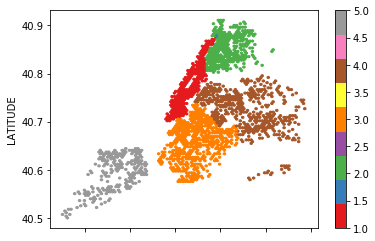

In [80]:

valid_latlon.plot.hexbin('LONGITUDE', 'LATITUDE', C='BORO_CODE', cmap='Set1')

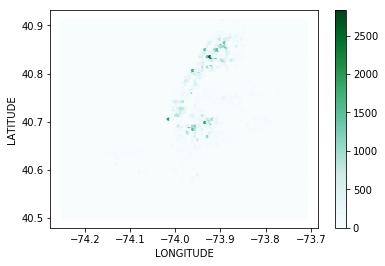

In [81]:

valid_latlon.plot.hexbin('LONGITUDE', 'LATITUDE', sharex=False)

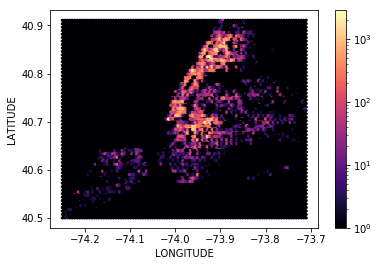

In [82]:
valid_latlon.plot.hexbin('LONGITUDE', 'LATITUDE', sharex=False, bins='log', cmap='magma')


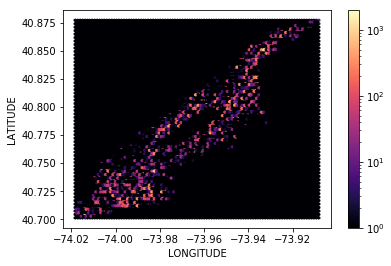

In [83]:
manhattan_rats = valid_latlon[valid_latlon.BORO_CODE==1]
manhattan_rats.plot.hexbin('LONGITUDE', 'LATITUDE', sharex=False, bins='log', cmap='magma')


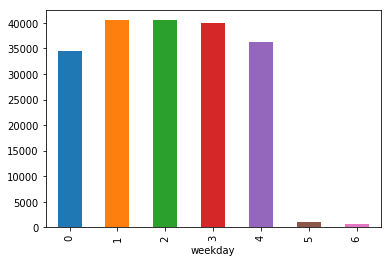

In [84]:
inspection_date = pd.DatetimeIndex(rats.INSPECTION_DATE)

fig, ax = plt.subplots()
rats.groupby(inspection_date.weekday)['JOB_ID'].count().plot(kind='bar', ax=ax)
ax.set_xlabel('weekday');

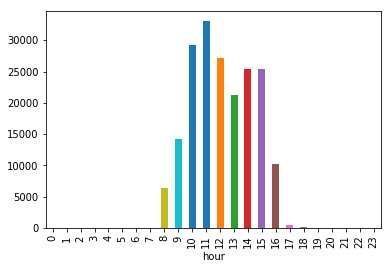

In [85]:
fig, ax = plt.subplots()
rats.groupby(inspection_date.hour)['JOB_ID'].count().plot(kind='bar', ax=ax)
ax.set_xlabel('hour');

Text(0.5, 0, 'month')

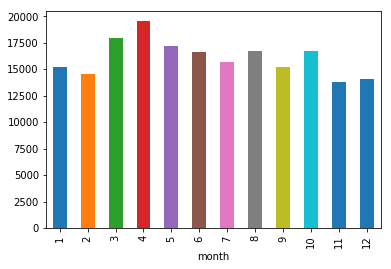

In [86]:
fig, ax = plt.subplots()
rats.groupby(inspection_date.month)['JOB_ID'].count().plot(kind='bar', ax=ax)
ax.set_xlabel('month')